## Get Data from Yahoo finance for Maruti NS 
* 1 day data for short term 
* 1 week data for long term

pip install yfinance

In [170]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd
import statistics
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [171]:
tickers_list=['MARUTI.NS']
today = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date_short = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y-%m-%d')
start_date_long = (datetime.datetime.now() - datetime.timedelta(days=20*365)).strftime('%Y-%m-%d')

In [172]:
short_data = yf.download(tickers=tickers_list, start=start_date_short, end=today, interval="1d")


[*********************100%***********************]  1 of 1 completed


In [173]:
short_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-09,1738.900024,1770.000000,1709.500000,1763.750000,1626.303223,1184977
2013-12-10,1763.000000,1780.599976,1746.000000,1751.800049,1615.284302,1048021
2013-12-11,1743.300049,1775.900024,1735.000000,1753.000000,1616.390747,668007
2013-12-12,1748.000000,1748.000000,1710.400024,1714.800049,1581.167847,478485
2013-12-13,1710.000000,1719.949951,1682.599976,1689.599976,1557.931396,577334
...,...,...,...,...,...,...
2023-11-29,10570.000000,10634.549805,10525.700195,10599.250000,10599.250000,343341
2023-11-30,10581.000000,10649.000000,10546.099609,10608.700195,10608.700195,665660
2023-12-01,10608.000000,10759.000000,10533.049805,10585.700195,10585.700195,591519


In [175]:
long_data = yf.download(tickers=tickers_list, start=start_date_long, end=today, interval="1wk")


[*********************100%***********************]  1 of 1 completed


In [176]:
long_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-08,370.000000,370.399994,357.000000,363.500000,318.295868,5262703
2003-12-15,364.500000,366.850006,353.100006,359.350006,314.662018,11863067
2003-12-22,359.000000,375.049988,353.549988,369.299988,323.374634,11115569
2003-12-29,371.000000,386.899994,367.500000,380.399994,333.094238,12389197
2004-01-05,383.000000,448.000000,364.500000,439.700012,385.019897,18575098
...,...,...,...,...,...,...
2023-11-06,10338.950195,10449.599609,10235.849609,10388.799805,10388.799805,1559331
2023-11-13,10429.000000,10606.799805,10363.650391,10523.500000,10523.500000,1590916
2023-11-20,10500.000000,10619.000000,10394.049805,10515.650391,10515.650391,1759505


## Do Preprocessing on the data

In [179]:
short_data.dropna(how='any',inplace=True)

In [180]:
long_data.dropna(how='any',inplace=True)

In [181]:
print(short_data.describe())
print(short_data.isnull().sum())


               Open          High           Low         Close     Adj Close  \
count   2464.000000   2464.000000   2464.000000   2464.000000   2464.000000   
mean    6460.062667   6528.100291   6385.162042   6454.383258   6217.920033   
std     2227.472911   2242.386545   2207.269132   2223.029745   2233.646259   
min     1577.000000   1603.000000   1540.400024   1566.000000   1443.963501   
25%     4578.037476   4632.500000   4515.062500   4566.875122   4254.620605   
50%     6979.925049   7052.199951   6880.524902   6968.699951   6748.656738   
75%     8157.362427   8232.712402   8053.150024   8140.287598   7838.815430   
max    10763.099609  10845.000000  10711.049805  10788.450195  10788.450195   

             Volume  
count  2.464000e+03  
mean   7.146133e+05  
std    5.604466e+05  
min    0.000000e+00  
25%    3.769980e+05  
50%    5.678935e+05  
75%    8.965615e+05  
max    1.056777e+07  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0


In [15]:
print(long_data.describe())
print(long_data.isnull().sum())

               Open          High           Low         Close     Adj Close  \
count    240.000000    240.000000    240.000000    240.000000    240.000000   
mean    3727.442913   3966.503965   3517.407496   3758.532078   3589.905282   
std     3192.145827   3344.433953   3050.728107   3205.577524   3148.036751   
min      360.950012    381.950012    300.000000    354.250000    311.306183   
25%      960.975006   1024.725006    870.425003    971.112518    866.737885   
50%     1669.799988   1803.500000   1565.250000   1688.775024   1538.960083   
75%     6864.537598   7336.474976   6541.949829   6860.937622   6696.635498   
max    10610.599609  10845.000000  10533.049805  10610.599609  10610.599609   

             Volume  
count  2.400000e+02  
mean   2.130593e+07  
std    2.484196e+07  
min    5.915190e+05  
25%    1.074268e+07  
50%    1.467683e+07  
75%    2.165557e+07  
max    1.739468e+08  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0


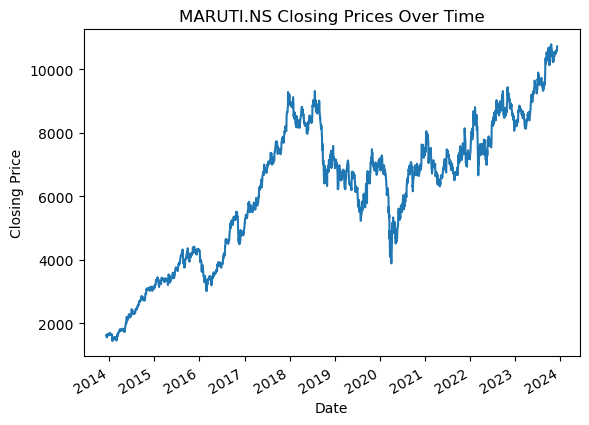

In [182]:
import matplotlib.pyplot as plt

short_data['Adj Close'].plot(title='MARUTI.NS Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


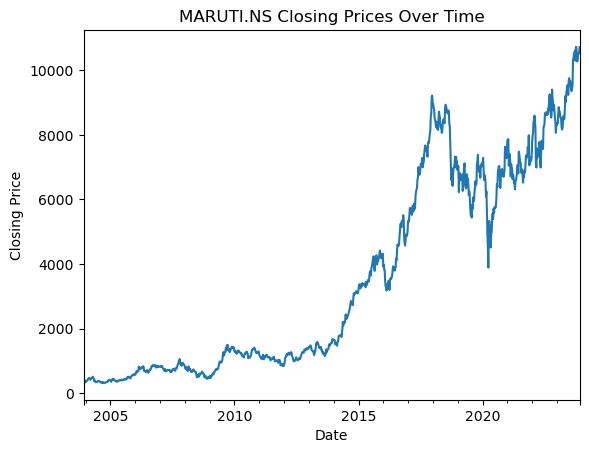

In [183]:
import matplotlib.pyplot as plt

long_data['Adj Close'].plot(title='MARUTI.NS Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


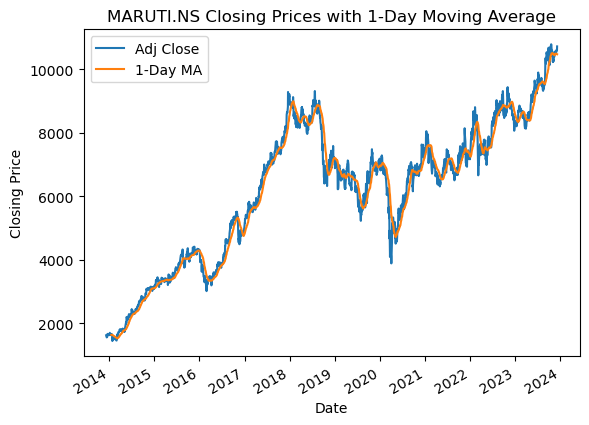

In [218]:
short_data['Adj Close'].plot(title='MARUTI.NS Closing Prices with 1-Day Moving Average')
short_data['Adj Close'].rolling(window=30).mean().plot(label='1-Day MA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


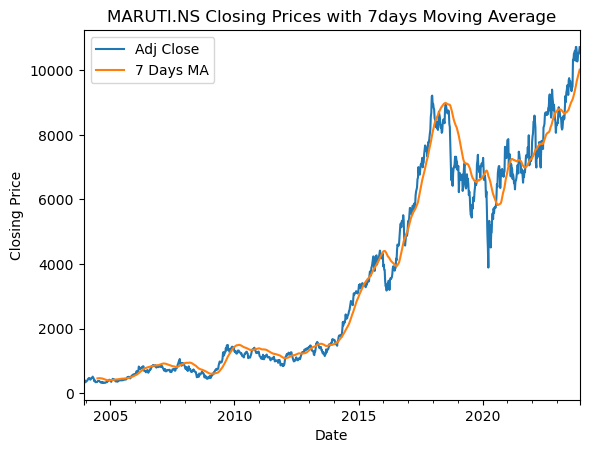

In [217]:
long_data['Adj Close'].plot(title='MARUTI.NS Closing Prices with 7days Moving Average')
long_data['Close'].rolling(window=30).mean().plot(label='7 Days MA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [187]:
# Assuming 'short_data' is your DataFrame
short_data.to_csv('short_data.csv')


In [188]:
# Assuming 'short_data' is your DataFrame
long_data.to_csv('long_data.csv')


In [195]:
def upload_to_s3(data, s3_path):
    #access_key = '###########'
    #secret_key = '**********'
    region_name = 'us-east-1'
    
    boto3.setup_default_session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name)
    
    s3_client = boto3.client('s3')
    # Extract bucket name and key from s3_path
    bucket_name, key = s3_path.replace('s3://', '').split('/', 1)


    csv_buffer = StringIO()
    csv_buffer.write(data)
    s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket_name, Key=key)

In [198]:
# Upload to S3
short_data_csv = short_data.to_csv()
long_data_csv = long_data.to_csv()
upload_to_s3(short_data_csv, 's3://fpshorttermbucket/short_data.csv')
upload_to_s3(long_data_csv, 's3://fplongtermbucket/long_data.csv')

In [219]:
short_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-09,1738.900024,1770.000000,1709.500000,1763.750000,1626.303223,1184977
2013-12-10,1763.000000,1780.599976,1746.000000,1751.800049,1615.284302,1048021
2013-12-11,1743.300049,1775.900024,1735.000000,1753.000000,1616.390747,668007
2013-12-12,1748.000000,1748.000000,1710.400024,1714.800049,1581.167847,478485
2013-12-13,1710.000000,1719.949951,1682.599976,1689.599976,1557.931396,577334


#### Outlier Treatment 
#### Then do on the missing data backfill

In [221]:
import pandas as pd
#Outlier treatment for Short and Long
def treat_outliers(data, columns):
    for column in columns:
        # Calculate IQR for the column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with NaN
        data[column] = data[column].mask((data[column] < lower_bound) | (data[column] > upper_bound))

    # Fill missing values with backfill
    data.fillna(method='bfill', inplace=True)

    return data

# List of columns to treat outliers
columns_to_treat = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Treat outliers in the 'Adj Close' column for short data
short_data = treat_outliers(short_data, columns_to_treat)

# Treat outliers in the 'Adj Close' column for long data
long_data = treat_outliers(long_data, columns_to_treat)

In [222]:
print(short_data)

                    Open          High           Low         Close  \
Date                                                                 
2013-12-09   1738.900024   1770.000000   1709.500000   1763.750000   
2013-12-10   1763.000000   1780.599976   1746.000000   1751.800049   
2013-12-11   1743.300049   1775.900024   1735.000000   1753.000000   
2013-12-12   1748.000000   1748.000000   1710.400024   1714.800049   
2013-12-13   1710.000000   1719.949951   1682.599976   1689.599976   
...                  ...           ...           ...           ...   
2023-11-29  10570.000000  10634.549805  10525.700195  10599.250000   
2023-11-30  10581.000000  10649.000000  10546.099609  10608.700195   
2023-12-01  10608.000000  10759.000000  10533.049805  10585.700195   
2023-12-04  10695.000000  10695.099609  10425.000000  10599.450195   
2023-12-05  10650.900391  10770.000000  10563.400391  10721.900391   

               Adj Close     Volume  
Date                                 
2013-12-09   

In [223]:
print(long_data)

                    Open          High           Low         Close  \
Date                                                                 
2003-12-08    370.000000    370.399994    357.000000    363.500000   
2003-12-15    364.500000    366.850006    353.100006    359.350006   
2003-12-22    359.000000    375.049988    353.549988    369.299988   
2003-12-29    371.000000    386.899994    367.500000    380.399994   
2004-01-05    383.000000    448.000000    364.500000    439.700012   
...                  ...           ...           ...           ...   
2023-11-06  10338.950195  10449.599609  10235.849609  10388.799805   
2023-11-13  10429.000000  10606.799805  10363.650391  10523.500000   
2023-11-20  10500.000000  10619.000000  10394.049805  10515.650391   
2023-11-27  10515.650391  10759.000000  10506.000000  10585.700195   
2023-12-04  10695.000000  10770.000000  10425.000000  10721.900391   

               Adj Close     Volume  
Date                                 
2003-12-08   

In [189]:
# Find missing values in the entire DataFrame for Daily Data
missing_values = short_data.isna()


In [190]:
# Count missing values in each column
missing_count_per_column = short_data.isna().sum()

# Display the count of missing values per column
print(missing_count_per_column)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [192]:
# Find missing values in the entire DataFrame for Weekly Data
missing_values_long = long_data.isna()
missing_values_long

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-08,False,False,False,False,False,False
2003-12-15,False,False,False,False,False,False
2003-12-22,False,False,False,False,False,False
2003-12-29,False,False,False,False,False,False
2004-01-05,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-11-06,False,False,False,False,False,False
2023-11-13,False,False,False,False,False,False
2023-11-20,False,False,False,False,False,False


In [193]:
# Count missing values in each column
missing_count_per_column_long = long_data.isna().sum()

# Display the count of missing values per column
print(missing_count_per_column_long)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## CICD Pipeline Code
 * Fetch data from yahoo finance daily and weekly
 * upload the file on S3 bucket
 * create automl experiment which test with multiple model using sage maker
 * creata a endpoint using the best model provided by the experiment

In [200]:
from io import StringIO
import yfinance as yf
import pandas as pd
import boto3
import datetime
import time


def main_handler(event, context):
    today = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date_short = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y-%m-%d')
    start_date_long = (datetime.datetime.now() - datetime.timedelta(days=20*365)).strftime('%Y-%m-%d')

    # Download daily data
    short_data = yf.download(tickers=['MARUTI.NS'], start=start_date_short, end=today, interval="1d")
    short_data_csv = short_data.to_csv()

    # Download weekly data
    long_data = yf.download(tickers=['MARUTI.NS'], start=start_date_long, end=today, interval="1wk")
    long_data_csv = long_data.to_csv()
    
    # Upload to S3
    upload_to_s3(short_data_csv, 's3://fpshorttermbucket/short_data.csv')
    upload_to_s3(long_data_csv, 's3://fplongtermbucket/long_data.csv')

    # Create and deploy SageMaker model
    create_and_deploy_sagemaker_model('fpshortterm', 'fpshorttermbucket','s3://fpshorttermbucket/short_data.csv')
    create_and_deploy_sagemaker_model('fplongterm', 'fplongtermbucket', 's3://fplongtermbucket/long_data.csv')

def upload_to_s3(data, s3_path):
    #access_key = '************'
    #secret_key = '**********'
    region_name = 'us-east-1'
    
    boto3.setup_default_session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name)
    
    s3_client = boto3.client('s3')
    # Extract bucket name and key from s3_path
    bucket_name, key = s3_path.replace('s3://', '').split('/', 1)


    csv_buffer = StringIO()
    csv_buffer.write(data)
    s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket_name, Key=key)

def create_and_deploy_sagemaker_model(endpoint_name, s3_bucket,s3_path):
    
    # Generate a unique model name based on the current date
    today = datetime.datetime.now().strftime('%Y-%m-%d')
    model_name = f'{endpoint_name}-model-{today}-19'

    # Set the target column and weightage for all features
    target_column = 'Adj Close'
    feature_weightage = 'auto'

    # Set the training method to Auto
    training_method = 'Auto'

    # Set up SageMaker client
    sagemaker = boto3.client('sagemaker')

    # Create Autopilot experiment
    experiment_name = create_autopilot_experiment(sagemaker, model_name, s3_bucket,s3_path, target_column, feature_weightage, training_method)
    
    # Wait for the best candidate to complete training
    wait_for_training_completion(sagemaker, experiment_name, model_name)

def create_autopilot_experiment(sagemaker, experiment_name, s3_bucket,s3_input_path, target_column, feature_weightage, training_method):
    # Specify Autopilot job configuration
    autopilot_job_config = {
        'CompletionCriteria': {
            'MaxRuntimePerTrainingJobInSeconds': 1800,  # Set the maximum runtime
            'MaxCandidates': 250,
            'MaxAutoMLJobRuntimeInSeconds': 7200,
        },
        'SecurityConfig': {
            'EnableInterContainerTrafficEncryption': False
        }
    }

    # Start Autopilot job
    sagemaker.create_auto_ml_job(
        AutoMLJobName=experiment_name,
        InputDataConfig=[
            {
                'DataSource': {
                    'S3DataSource': {
                        'S3DataType': 'S3Prefix',
                        'S3Uri': s3_input_path
                    }
                },
                'TargetAttributeName': target_column
            }
        ],
        OutputDataConfig={
            'S3OutputPath': f's3://{s3_bucket}/output'
        },
        RoleArn='arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726',
        AutoMLJobConfig=autopilot_job_config
    )

    return experiment_name
def wait_for_training_completion(sagemaker, experiment_name, model_name, poll_interval_seconds=60):
    while True:
        response = sagemaker.describe_auto_ml_job(AutoMLJobName=experiment_name)

        # Print the response for debugging
        print("API Response:", response)
        print("****************")
        # Check if response is a string (error response) and print the error
        if isinstance(response, str):
            print(f"Error: {response}")
            print("**********1*************")
            break

        auto_ml_job_status = response.get('AutoMLJobStatus', {})
        
        # Check if the job is in progress
        if auto_ml_job_status == 'InProgress':
            print("Model training is still in progress. Waiting...")
            time.sleep(poll_interval_seconds)
            continue

        print(f"Model training for candidate {best_candidate['CandidateName']} is still in progress. Waiting...")
        time.sleep(poll_interval_seconds)

# Uncomment and run the script for local testing
# main_handler(None, None)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 7, 0, 849000, tzinfo=tzlocal()), 'AutoMLJobStatus': 'InProgres

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 13, 15, 357000, tzinfo=tzlocal()), 'AutoMLJobStatus': 'InProgr

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 17, 11, 844000, tzinfo=tzlocal()), 'AutoMLJobStatus': 'InProgr

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 21, 16, 738000, tzinfo=tzlocal()), 'AutoMLJobStatus': 'InProgr

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 25, 35, 654000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 27, 23, 521000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 29, 25, 628000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 31, 28, 650000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 33, 31, 930000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 35, 35, 67000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 37, 40, 458000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 39, 44, 296000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 41, 55, 654000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 43, 44, 170000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 45, 49, 853000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 47, 55, 448000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 49, 53, 141000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 51, 59, 876000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 54, 7, 156000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 56, 13, 46000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 20, 58, 5, 28000, tzinfo=tzlocal()), 'BestCandidate': {'CandidateN

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 0, 13, 432000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 2, 20, 442000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 4, 13, 177000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 6, 22, 372000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 8, 12, 939000, tzinfo=tzlocal()), 'BestCandidate': {'Candidate

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 10, 23, 447000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 11, 20, 425000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 11, 20, 425000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 11, 20, 425000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

API Response: {'AutoMLJobName': 'fpshortterm-model-2023-12-06-19', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:352773120245:automl-job/fpshortterm-model-2023-12-06-19', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://fpshorttermbucket/short_data.csv'}}, 'TargetAttributeName': 'Adj Close', 'ContentType': 'text/csv;header=present', 'ChannelType': 'training'}], 'OutputDataConfig': {'S3OutputPath': 's3://fpshorttermbucket/output'}, 'RoleArn': 'arn:aws:iam::352773120245:role/service-role/AmazonSageMaker-ExecutionRole-20231205T004726', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 250, 'MaxRuntimePerTrainingJobInSeconds': 1800, 'MaxAutoMLJobRuntimeInSeconds': 7200}, 'SecurityConfig': {'EnableInterContainerTrafficEncryption': False}}, 'CreationTime': datetime.datetime(2023, 12, 6, 20, 1, 3, 666000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 6, 21, 11, 20, 425000, tzinfo=tzlocal()), 'BestCandidate': {'Candidat

In [9]:
import boto3
import time

def deploy_model(endpoint_name, experiment_name, best_candidate_name):
    #access_key = '********'
    #secret_key = '*************'
    region_name = 'us-east-1'
    
    session = boto3.Session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name
    )

    sagemaker = session.client('sagemaker')
    listmodel=sagemaker.list_models()
    models = listmodel['Models']

    # Filter models starting with 'fpshortterm' and 'fplongterm'
    fpterm_models = [model for model in models if model['ModelName'].startswith(best_candidate_name)]
    # Sort models by creation time (latest first)
    fpterm_models.sort(key=lambda x: x['CreationTime'], reverse=True)
    # Get the latest models
    latest_fpterm_model = fpterm_models[0] if fpterm_models else None
    latest_fpterm_name = latest_fpterm_model['ModelName']
    print(latest_fpterm_name)
    # Specify model deployment configuration
    model_deploy_config = {
        'EndpointName': endpoint_name,
        'EndpointConfigName': experiment_name,  # Use the Autopilot experiment name as the endpoint config
    }
    print(model_deploy_config)
    production_variant = {
        'InstanceType': 'ml.t2.medium',
        'InitialInstanceCount': 1,
        'ModelName': latest_fpterm_name,  # Use the best candidate name as the model name
        'VariantName': 'AllTraffic'
    }
    print(production_variant)
    create_endpoint_config_response = sagemaker.create_endpoint_config(
        EndpointConfigName=experiment_name,
        ProductionVariants=[production_variant]
    )
    # Deploy the model
    sagemaker.create_endpoint(**model_deploy_config)

experiment_name = "fpshortterm-model-2023-12-06-19"
endpoint_name = "fpshortterm-backend4"
best_candidate_name = "fpshortterm"

deploy_model(experiment_name, endpoint_name,best_candidate_name)
# Set the proper experiment name and endpoint name
experiment_name = "fplongterm-model-2023-12-05"
endpoint_name = "fplongterm-backend4"
best_candidate_name = "fplongterm"

# Deploy the best model
deploy_model(experiment_name, endpoint_name,best_candidate_name)



fpshortterm-model-1701930700888
{'EndpointName': 'fpshortterm-model-2023-12-06-19', 'EndpointConfigName': 'fpshortterm-backend4'}
{'InstanceType': 'ml.t2.medium', 'InitialInstanceCount': 1, 'ModelName': 'fpshortterm-model-1701930700888', 'VariantName': 'AllTraffic'}
fplongterm-model-1701885320491
{'EndpointName': 'fplongterm-model-2023-12-05', 'EndpointConfigName': 'fplongterm-backend4'}
{'InstanceType': 'ml.t2.medium', 'InitialInstanceCount': 1, 'ModelName': 'fplongterm-model-1701885320491', 'VariantName': 'AllTraffic'}


## Call AWS Sagemaker endpoint to get the prediction

!pip install boto3


!pip install sagemaker


In [28]:
import boto3
import sagemaker

#access_key = '************'
#secret_key = '**************'
region_name = 'us-east-1'

session = boto3.Session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name
)

sm_rt = session.client('runtime.sagemaker')

In [229]:
ep_name = 'fpshortterm-model-2023-12-06-19'
sample = '2023-12-06,10650.90,10770.00,10563.40,10721.90,580968'
response = sm_rt.invoke_endpoint(EndpointName = ep_name, ContentType = 'text/csv', Accept = 'text/csv', Body = sample)
response = response['Body'].read().decode("utf-8")
print(response)

10555.46875



In [ ]:
ep_name = 'fpshortterm-model-2023-12-06-19'
sample = '2023-12-06,10650.90,10770.00,10563.40,10721.90,580968'
response = sm_rt.invoke_endpoint(EndpointName = ep_name, ContentType = 'text/csv', Accept = 'text/csv', Body = sample)
response = response['Body'].read().decode("utf-8")
print(response)

## To delete the AWS Sagemaker Endpoint

In [10]:

import boto3
import sagemaker

#access_key = '***************'
#secret_key = '***************'
region_name = 'us-east-1'

session = boto3.Session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name
)
ep_name = 'fpshortterm-model-2023-12-06-19'
sm = session.client('sagemaker')
sm.delete_endpoint(EndpointName=ep_name)

{'ResponseMetadata': {'RequestId': '94fe8d96-eed0-406d-b4da-083db498a8cc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '94fe8d96-eed0-406d-b4da-083db498a8cc',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 10 Dec 2023 04:48:47 GMT'},
  'RetryAttempts': 0}}

In [11]:
import boto3
import sagemaker

#access_key = '***************'
#secret_key = '*****************'
region_name = 'us-east-1'

session = boto3.Session(
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region_name
)
ep_name = 'fplongterm-model-2023-12-05'
sm = session.client('sagemaker')
sm.delete_endpoint(EndpointName=ep_name)

{'ResponseMetadata': {'RequestId': '2782761c-2de3-45d1-b757-133f51d3d7a8',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '2782761c-2de3-45d1-b757-133f51d3d7a8',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sun, 10 Dec 2023 04:48:50 GMT'},
  'RetryAttempts': 1}}